#  Importar datos y crear funciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
%matplotlib notebook

In [2]:
viajes=pd.read_csv('Encuesta_de_movilidad_de_Bogot__2015___Caracterizaci_n_viajes___Origen_Destino.csv')
coo_t=viajes[['MEDIO_PREDOMINANTE','LATITUD_ORIGEN', 'LATITUD_DESTINO', 'LONGITUD_ORIGEN','LONGITUD_DESTINO', 'DIFERENCIA_HORAS']].copy()
coo_t.dropna(inplace=True)

In [3]:
def to_time(x):
    T=[float(i) for i in x.split(':')]
    tiempo=T[0]+T[1]/60 + T[2]/3600
    return tiempo

def Earth_Dist(long1,lat1,long2,lat2):
        a1=math.radians(lat1)
        a2=math.radians(long1)
        b1=math.radians(lat2)
        b2=math.radians(long2)
        dlon= b2-a2
        dlat= b1-a1
        a = (math.sin(dlat/2))**2 + math.cos(a1) * math.cos(b1) * (math.sin(dlon/2))**2
        c = 2*math.atan2(math.sqrt(a), math.sqrt(1 - a))
        R = 6378.145
        d = R * c
        return d
    
def fix_lat(x):
    coor=str(int(x))
    return float(coor[0]+'.'+coor[1:])

def fix_lon(x):
    coor=str(int(x))
    return float(coor[:3]+'.'+coor[3:])

# Transformar Coordenadas (El coco)


# Filtrar distancias y velocidades

In [4]:
coo_t['tiempo_recorrido']=coo_t['DIFERENCIA_HORAS'].apply(lambda x: to_time(x))
coo_t=coo_t[coo_t.tiempo_recorrido!=0.0].copy()
coo_t['LONGITUD_ORIGEN']=coo_t['LONGITUD_ORIGEN'].apply(lambda x: fix_lon(x))
coo_t['LATITUD_ORIGEN']=coo_t['LATITUD_ORIGEN'].apply(lambda x: fix_lat(x))
coo_t['LONGITUD_DESTINO']=coo_t['LONGITUD_DESTINO'].apply(lambda x: fix_lon(x))
coo_t['LATITUD_DESTINO']=coo_t['LATITUD_DESTINO'].apply(lambda x: fix_lat(x))
coo_t['distancia_km']=coo_t.apply(lambda x: Earth_Dist(x['LONGITUD_ORIGEN'],x['LATITUD_ORIGEN'], x['LONGITUD_DESTINO'],x["LATITUD_DESTINO"]),axis=1)
coo_t["velocidad km/h"]=coo_t.apply(lambda x: x["distancia_km"]/x["tiempo_recorrido"],axis=1)

clean_data=coo_t[(coo_t.LATITUD_ORIGEN <=5.0) &  (coo_t.LATITUD_ORIGEN >= 3.0) 
      & (coo_t.LATITUD_DESTINO >=3.0) &  (coo_t.LATITUD_DESTINO >= 5.0)
     & (coo_t.LONGITUD_ORIGEN >=-75.0) &  (coo_t.LONGITUD_ORIGEN <= -73.5) 
      & (coo_t.LONGITUD_DESTINO >=-75.0) &  (coo_t.LONGITUD_DESTINO <= -73.5)]
clean_data=clean_data[clean_data['velocidad km/h']<=100.0]

# Visualizar para hacer Inferencias

<IPython.core.display.Javascript object>


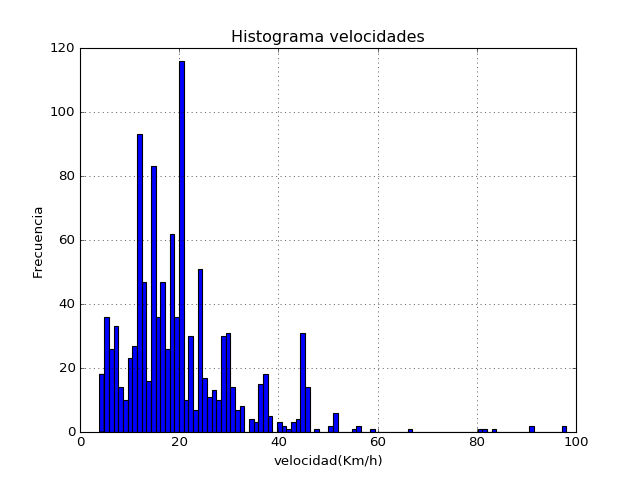

In [9]:
clean_data['velocidad km/h'].hist(bins=100)
plt.title('Histograma velocidades')
plt.xlabel('velocidad(Km/h)')
plt.ylabel('Frecuencia')

<IPython.core.display.Javascript object>


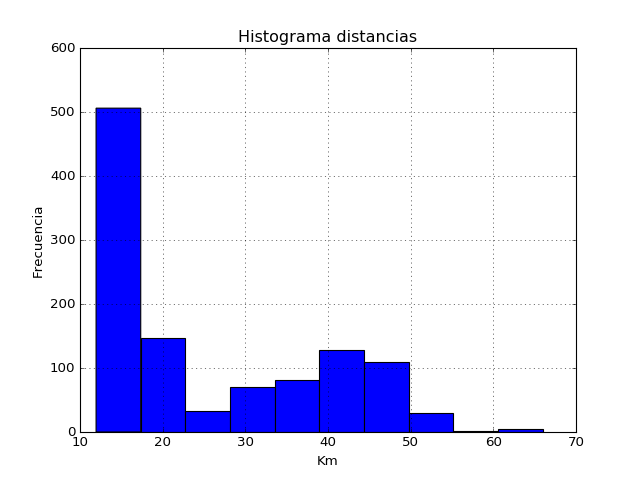

In [10]:
clean_data['distancia_km'].hist(bins=10)
plt.title('Histograma distancias')
plt.xlabel('Km')
plt.ylabel('Frecuencia')

<IPython.core.display.Javascript object>


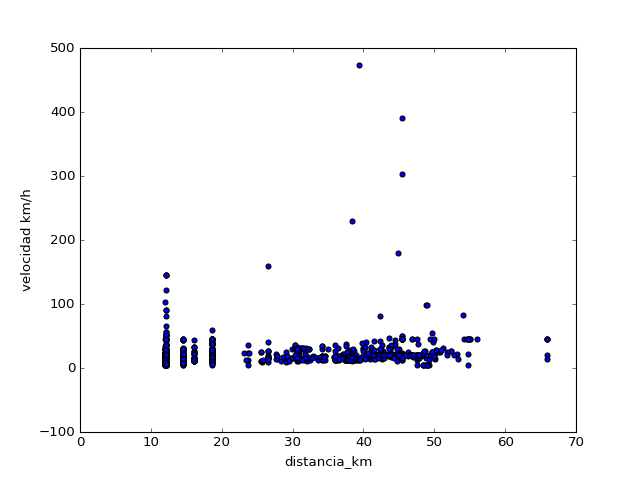

In [20]:
plt.figure()
plt.scatter(clean_data['distancia_km'],clean_data['velocidad km/h'])
plt.xlabel('distancia_km')
plt.ylabel('velocidad km/h')

In [15]:
(clean_data.MEDIO_PREDOMINANTE.value_counts(normalize=True))*100

INTERMUNICIPAL                    24.460432
AUTO                              19.334532
Transmilenio                      17.086331
ESPECIAL                          13.039568
TPC-SITP                           9.892086
MOTO                               6.025180
PEATON                             5.665468
BICICLETA, BICICLETA CON MOTOR     2.787770
TAXI                               0.899281
ILEGAL                             0.539568
OTROS                              0.269784
Name: MEDIO_PREDOMINANTE, dtype: float64